# Centrifuge with liquid liquid equilibrium

### Simulation based on liquid-liquid equilibrium using Dortmund modified UNIFAC activity coefficients and modified Raoult's law. Purchase price based on Apostolakou et. al. "Techno-economic analysis of a biodiesel production process from vegetable oils". Fuel Processing Technology (2009)

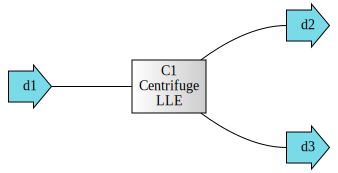

Centrifuge_LLE: C1
ins...
[0] d1
    phase: 'l', T: 60 degC, P: 1 atm
    flow: Lipid      0.0114
          Methanol   0.58
          Glycerol   0.102
          Biodiesel  0.307
          net        88 kmol/hr 
outs...
[0] d2
    phase: 'l', T: 60 degC, P: 1 atm
    flow: Lipid      0.0221
          Methanol   0.372
          Glycerol   0.00993
          Biodiesel  0.596
          net        45.3 kmol/hr 
[1] d3
    phase: 'L', T: 60 degC, P: 1 atm
    flow: Lipid      6.95e-15
          Methanol   0.8
          Glycerol   0.2
          Biodiesel  0.00023
          net        42.7 kmol/hr 

results...
{'Operation': {},
 'Design': {},
 'Cost':
   {'Vessel Cost': 1.39e+05 (USD)}}


In [1]:
from biosteam import Stream, Units
from Biodiesel_species import biodiesel_species

# Set up stream
Stream.species = biodiesel_species
stream = Stream(species=('Lipid', 'Methanol', 'Glycerol', 'Biodiesel'),
                flow=(1, 51, 9, 27), T=333.15)

# Set up centrifuge
C1 = Units.Centrifuge_LLE('C1',
                          specie_IDs=('Lipid', 'Methanol', 'Biodiesel'),
                          split=(1, 0.5, 1),
                          solvents=('Glycerol',),
                          solvent_split=(0.05,))
C1.ins = stream

# Run all methods
C1.run()
C1.operation()
C1.design()
C1.cost()

# See all results
C1.diagram
C1.show(T='degC', P='atm', in_fractions= True)
print('\nresults...\n' + str(C1.results))